## Intelligent Systems - HW1
### Soroush Mesforush Mashhad
#### SID: 810198472

### Question 2


## Part A :
Has been included in the report file

## Part B :Newton Method Implementation

In [15]:
import numpy as np
import pandas as pd 
import seaborn as sn
import matplotlib.pyplot as plt
import warnings
import random
import os

To have better discipline in coding, we shall split the program into different functions.

In [16]:
def func(x1, x2):
    return 2*x1**2 + 2*x2**2 - 17*x2*np.cos(0.2*np.pi*x1) - x1*x2

In [17]:
def Hessian (x1,x2):
    dfdx11 = 4 + 0.68*np.pi*np.pi*x2*np.cos(0.2*np.pi*x1)
    dfdx12 = -1
    dfdx21 = 3.4*np.pi*np.sin(0.2*np.pi*x1) - 1
    dfdx22 = 4
    return dfdx11 , dfdx12 , dfdx21 , dfdx22

In [18]:
def HessianInv(dfdx11 , dfdx12 , dfdx21 , dfdx22):
    Det = dfdx11 * dfdx22 - dfdx12*dfdx21
    dfdx11new = dfdx22/Det
    dfdx12new = -dfdx12/Det
    dfdx21new = -dfdx21/Det
    dfdx22new = dfdx11/Det
    return dfdx11new , dfdx12new , dfdx21new , dfdx22new

In [19]:
def Gradient (x1,x2):
    dfdx1 = 4*x1 + 3.4*np.pi * x2 *np.sin(0.2*np.pi *x1) - x2
    dfdx2 = 4*x2 - 17*np.cos(0.2*np.pi*x1)-x1
    return dfdx1 , dfdx2

In [22]:
def NewtonMethod(x1,x2,iterations):
    for i in range(iterations):
        dfdx11 , dfdx12 , dfdx21 , dfdx22 = Hessian(x1,x2)
        dfdx11new , dfdx12new , dfdx21new , dfdx22new = HessianInv(dfdx11 , dfdx12 , dfdx21 , dfdx22)
        dfdx1 , dfdx2 = Gradient(x1,x2)
        x1 = x1 - (dfdx11new*dfdx1 + dfdx12new*dfdx2)
        x2 = x2 - (dfdx21new*dfdx1 + dfdx22new*dfdx2)
    return x1 , x2

Now we shall go on to finding the minimum value

In [23]:
x1=1  
x2=3
iterations = 100
x1 , x2 = NewtonMethod(x1,x2,iterations)
MinVal = func(x1,x2)
print(f"x1 is : {x1} and x2 is : {x2}(after {iterations} iterations)")
print(f"The Minimum Value for the function is : {MinVal} (after {iterations} iterations)")

x1 is : 0.13087466007249957 and x2 is : 4.268357652256218(after 100 iterations)
The Minimum Value for the function is : -36.40349774185023 (after 100 iterations)


Now we go on to plot the wanted shape

In [24]:
#First we define the arrays for x1 and x2 with stepsize = 0.5
step = 0.5
rangex1 = np.linspace(-5,5,num=21)
rangex2 = np.linspace(0,10,num=21)
print(f"The range for x1 is :\n {rangex1}")
print(f"The range for x2 is :\n {rangex2}")

The range for x1 is :
 [-5.  -4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5
  2.   2.5  3.   3.5  4.   4.5  5. ]
The range for x2 is :
 [ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10. ]


In [36]:
#We know that we want to plot x2 in terms of x1 hence we need a new array
Plt = []
#Since we want to classify the data into three different categories we
#make the following agreement:
# Close -1 , Far = 0 , Farthest = 1
# We also create a new array to save these things in it
StateChecker = []
for x1 in rangex1:
    for x2 in rangex2:
        x1new , x2new = NewtonMethod(x1,x2,100)
        distance = np.abs(func(x1new, x2new) - (-36.4))
        if distance < 15:
            StateChecker.append(-1)
        elif distance < 150:
            StateChecker.append(0)
        else:
            StateChecker.append(1)
        Plt.append([x1,x2])

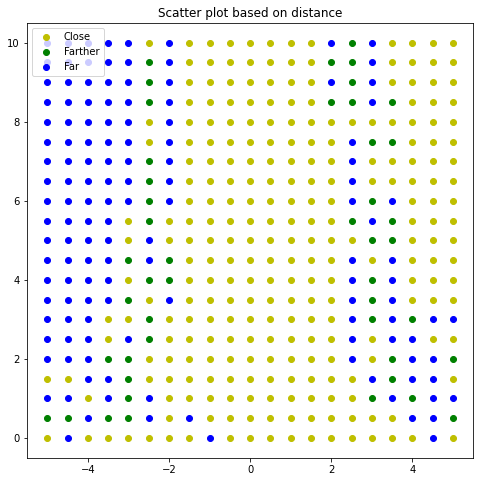

In [45]:
plt.figure(figsize=(8,8))
plt.title('Scatter plot based on distance')
plotlength = len(Plt)
for i in range(plotlength):
    x1,x2 = Plt[i]
    if StateChecker[i] == -1:
        plt.scatter(x1,x2,color = 'y')
    elif StateChecker[i] == 0:
        plt.scatter(x1,x2,color = 'b')
    elif StateChecker[i] == 1:
        plt.scatter(x1,x2,color = 'g')
plt.legend(['Close','Farther','Far'],loc='upper left')

## Part C : The Genetic Algorithm

Here we shall implement the genetic algorithm to find the local minimum of our given function

In [50]:
#What we shall optimize
def Func(x1, x2):
    return 2*x1**2 + 2*x2**2 - 17*x2*np.cos(0.2*np.pi*x1) - x1*x2 + 36.4

In [51]:
#The fitness function we use.
def FitnessFunc(x1,x2):
    Fit = Func(x1,x2)
    if Fit==0:
        return 100000
    else:
        return abs(1/Fit)

We shall initialize the answers of our opitimization problem

In [55]:
#We generate an arbitrary number for the length of the answers
Anslength = 750
Ans = []
for i in range(Anslength):
    randx1 = random.uniform(-15,15)
    randx2 = random.uniform(-15,15)
    Ans.append([randx1,randx2])
print(Ans[:5])
print(randx1)
print(randx2)

[[12.869902208791459, -11.499193575917133], [14.123658437897014, -2.2615601678641557], [-8.779448725416717, 2.3047111499210295], [-9.084817440577986, 14.327303737169288], [7.200711603416298, -8.499776573544679]]
-7.903688851010439
-1.1891577934183104


In [56]:
for k in range(Anslength*5):
    OrderedSolution = []
    for i in Ans:
        OrderedSolution.append((FitnessFunc(i[0],i[1]),i))
    OrderedSolution.sort()
    OrderedSolution.reverse()
    if OrderedSolution[0][0] > 100000:
        break
    OptimumSols = OrderedSolution[:int(Anslength/2)]    
    BestParamArr = []
    for u in OptimumSols:
        BestParamArr.append(u[1][0])
        BestParamArr.append(u[1][1])
    NewSols = []
    counter = 0
    while counter<Anslength*5:
        NewSols.append((random.choice(BestParamArr)*random.uniform(0.98,1.02),random.choice(BestParamArr)*random.uniform(0.98,1.02)))
        counter+=1
    Ans = NewSols
    if k%1000 ==0:
        print(k)
x = OrderedSolution[0][1]
print('x1 = ')
print(x[0])
print('x2 = ')
print(x[1])
Val = Func(x[0],x[1]) - 36.4
print("The value is :")
print(Val)

0
x1 = 
0.11895953539174675
x2 = 
4.2435585147612045
The value is :
-36.40000482314009
